In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import stats
from sklearn.metrics import roc_auc_score
from sklearn.utils import column_or_1d

from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.hbos import HBOS
from pyod.models.knn import KNN
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

import warnings
warnings.filterwarnings('ignore')

## Abalone 数据集

In [3]:
path = "./abalone/benchmarks/"
files = []
for filename in os.listdir(path):
    file_path = os.path.join(path, filename)
    files.append(file_path)
num_files = len(files)




Traing on  Cluster-based Local Outiler Factor (CBLOF)

On Training Data:
Cluster-based Local Outiler Factor (CBLOF) ROC:0.576, precision @ rank n:0.5394

On Test Data:
Cluster-based Local Outiler Factor (CBLOF) ROC:0.5911, precision @ rank n:0.5376

On Training Data:
Cluster-based Local Outiler Factor (CBLOF) ROC:0.8309, precision @ rank n:0.125

On Test Data:
Cluster-based Local Outiler Factor (CBLOF) ROC:0.6298, precision @ rank n:0.0


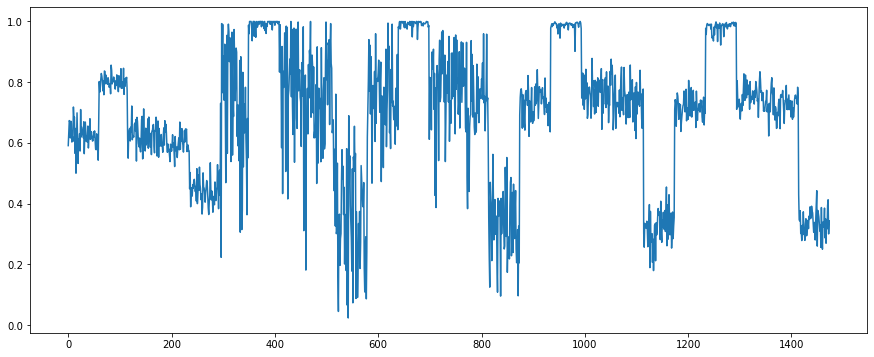




Traing on  Histogram-base Outlier Detection(HBOS)

On Training Data:
Histogram-base Outlier Detection(HBOS) ROC:0.4496, precision @ rank n:0.4302

On Test Data:
Histogram-base Outlier Detection(HBOS) ROC:0.4736, precision @ rank n:0.4488

On Training Data:
Histogram-base Outlier Detection(HBOS) ROC:0.8497, precision @ rank n:0.1875

On Test Data:
Histogram-base Outlier Detection(HBOS) ROC:0.4749, precision @ rank n:0.0


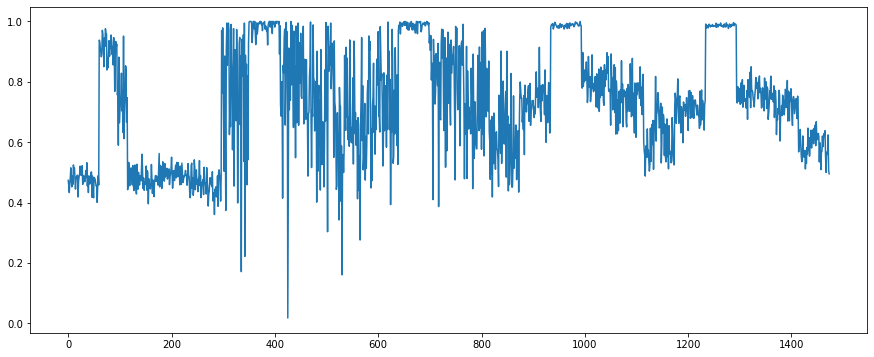




Traing on  KNN

On Training Data:
KNN ROC:0.7643, precision @ rank n:0.6893

On Test Data:
KNN ROC:0.7716, precision @ rank n:0.6917

On Training Data:
KNN ROC:0.859, precision @ rank n:0.125

On Test Data:
KNN ROC:0.7676, precision @ rank n:0.0


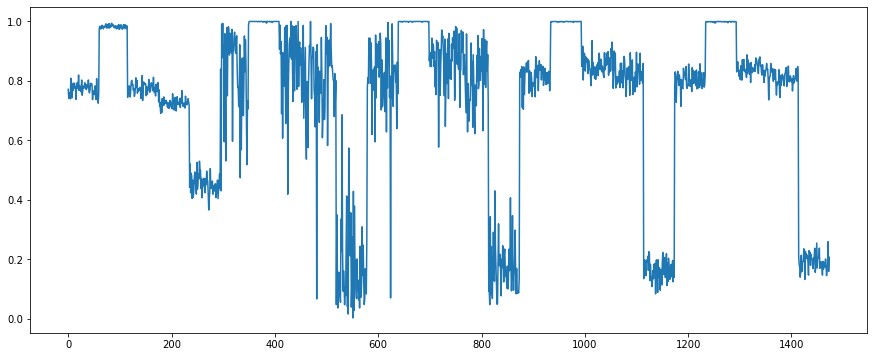

In [11]:
#定义分类器
classifiers = {
    "Cluster-based Local Outiler Factor (CBLOF)": CBLOF(random_state=42),
    "Histogram-base Outlier Detection(HBOS)": HBOS(),
    "KNN": KNN()
    }

for i, (clf_name, clf) in enumerate(classifiers.items()):
    print("\n\n\nTraing on ",clf_name)
    roc_clf=[]
    for i in range(num_files):
        df = pd.read_csv(files[i]) 
        X = df[["V1","V2","V3", "V4", "V5", "V6", "V7"]].values
        labels = np.where(df["ground.truth"] == "nominal" , 0 ,1)
        
        train_rate = 0.7
        X_train = X[:int(train_rate*len(X))]
        X_test = X[int(train_rate*len(X)):]
        y_train = labels[:int(train_rate*len(X))]
        y_test = labels[int(train_rate*len(X)):]

        clf.fit(X_train)

        # get the prediction labels and outlier scores of the training data
        y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
        y_train_scores = clf.decision_scores_  # raw outlier scores

        # get the prediction on the test data
        y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
        y_test_scores = clf.decision_function(X_test)  # outlier scores
    
        y = column_or_1d(y_test)
        y_pred = column_or_1d(y_test_scores)
        try:
            roc = np.round(roc_auc_score(y, y_pred), decimals=4)
            roc_clf.append(roc)
        except ValueError:
            pass
    
        if i % 1000 == 0:
            # evaluate and print the results
            print("\nOn Training Data:")
            evaluate_print(clf_name, y_train, y_train_scores)
            print("\nOn Test Data:")
            evaluate_print(clf_name, y_test, y_test_scores)
    plt.figure(figsize=(15, 6))
    x_data = [x for x in range(len(roc_clf))]
    plt.plot(x_data, roc_clf)
    plt.show()

## Skin 数据集

In [12]:
path = "./skin/benchmarks/"
files = []
for filename in os.listdir(path):
    file_path = os.path.join(path, filename)
    files.append(file_path)
num_files = len(files)




Traing on  Cluster-based Local Outiler Factor (CBLOF)

On Training Data:
Cluster-based Local Outiler Factor (CBLOF) ROC:0.6645, precision @ rank n:0.301

On Test Data:
Cluster-based Local Outiler Factor (CBLOF) ROC:0.678, precision @ rank n:0.3394

On Training Data:
Cluster-based Local Outiler Factor (CBLOF) ROC:0.7511, precision @ rank n:0.0

On Test Data:
Cluster-based Local Outiler Factor (CBLOF) ROC:0.7157, precision @ rank n:0.0


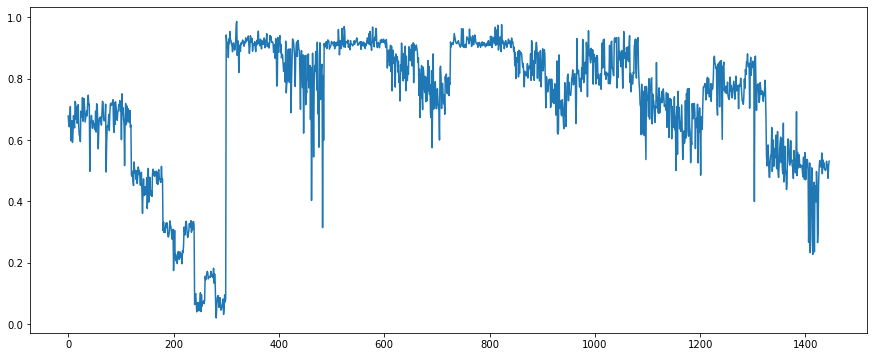




Traing on  Histogram-base Outlier Detection(HBOS)

On Training Data:
Histogram-base Outlier Detection(HBOS) ROC:0.5881, precision @ rank n:0.1709

On Test Data:
Histogram-base Outlier Detection(HBOS) ROC:0.5867, precision @ rank n:0.2016

On Training Data:
Histogram-base Outlier Detection(HBOS) ROC:0.4226, precision @ rank n:0.0

On Test Data:
Histogram-base Outlier Detection(HBOS) ROC:0.4002, precision @ rank n:0.0


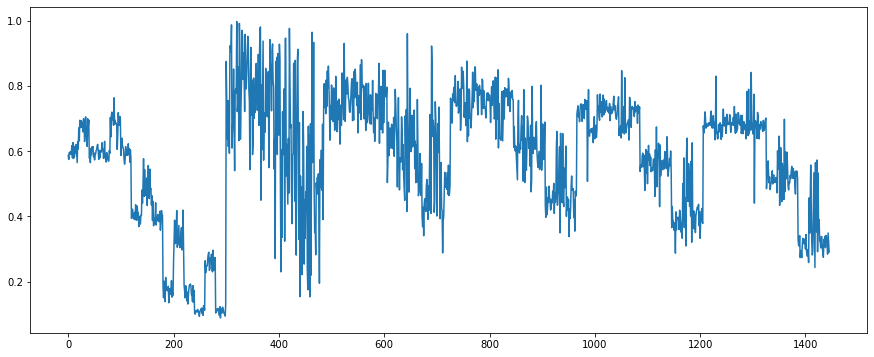




Traing on  KNN

On Training Data:
KNN ROC:0.7189, precision @ rank n:0.2122

On Test Data:
KNN ROC:0.7225, precision @ rank n:0.2715

On Training Data:
KNN ROC:0.955, precision @ rank n:0.0426

On Test Data:
KNN ROC:0.9322, precision @ rank n:0.0769


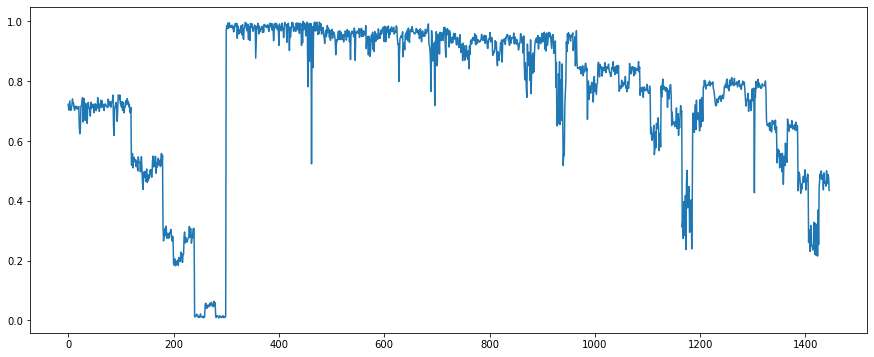

In [13]:
#定义分类器
classifiers = {
    "Cluster-based Local Outiler Factor (CBLOF)": CBLOF(random_state=42),
    "Histogram-base Outlier Detection(HBOS)": HBOS(),
    "KNN": KNN()
    }

for i, (clf_name, clf) in enumerate(classifiers.items()):
    print("\n\n\nTraing on ",clf_name)
    roc_clf=[]
    for i in range(num_files):
        df = pd.read_csv(files[i]) 
        X = df[["R","G","B"]].values
        labels = np.where(df["ground.truth"] == "nominal" , 0 ,1)
        
        train_rate = 0.7
        X_train = X[:int(train_rate*len(X))]
        X_test = X[int(train_rate*len(X)):]
        y_train = labels[:int(train_rate*len(X))]
        y_test = labels[int(train_rate*len(X)):]

        clf.fit(X_train)

        # get the prediction labels and outlier scores of the training data
        y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
        y_train_scores = clf.decision_scores_  # raw outlier scores

        # get the prediction on the test data
        y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
        y_test_scores = clf.decision_function(X_test)  # outlier scores
    
        y = column_or_1d(y_test)
        y_pred = column_or_1d(y_test_scores)
        try:
            roc = np.round(roc_auc_score(y, y_pred), decimals=4)
            roc_clf.append(roc)
        except ValueError:
            pass
    
        if i % 1000 == 0:
            # evaluate and print the results
            print("\nOn Training Data:")
            evaluate_print(clf_name, y_train, y_train_scores)
            print("\nOn Test Data:")
            evaluate_print(clf_name, y_test, y_test_scores)
    plt.figure(figsize=(15, 6))
    x_data = [x for x in range(len(roc_clf))]
    plt.plot(x_data, roc_clf)
    plt.show()